# Week 2

For this week the intention is to estimate the background of a sequence.

The task are the following:
* Task 1: Estimate the background with a non-adaptative model and evaluate the results
* Task 2: Now apply an adaptative model to evaluate the results
* Task 3: Compare our results with state of the art methods
* Task 4: Consider now colour into the background estimation

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pathlib import Path

from src.utils.annotation_reader import AnnotationReader
from src.utils.plot import plot_img
from src.background_estimation import AdaptativeBackgroundModel
from src.utils.processing import remove_noise_from_mask, detect_bbox_from_mask

## Data Location

In [4]:
DATA_ROOT = Path('data')
FULL_ANNOTATION_PATH = DATA_ROOT / 'ai_challenge_s03_c010-full_annotation.xml'
AICITY_DATA_ROOT = DATA_ROOT / Path('AICity_data/train/S03/c010')
FRAMES_LOCATION = DATA_ROOT / 'frames'
RESULTS_ROOT = Path('results')
VIDEO_PATH = AICITY_DATA_ROOT / 'vdo.avi'

assert DATA_ROOT.exists()
assert FULL_ANNOTATION_PATH.exists()
assert AICITY_DATA_ROOT.exists()
assert FRAMES_LOCATION.exists()
assert RESULTS_ROOT.exists()

## Task 1

For this task we will use the first 25% of frames for training and the rest for evaluation.

## Task 2

In this task now we estimate the background using 25% of the first frames for training and the rest for adaptative background estimation.

So first lets:
* get the groundtruth bounding boxes
* read the 25% of the first frames 
* get the roi image, which will be useful to predict where the bboxes should be.

In [5]:
# Read the ground_truth bounfing boxes
reader = AnnotationReader(AICITY_DATA_ROOT / 'gt/gt.txt')
gt_bounding_boxes = reader.get_bounding_boxes(classes=['car'], group_by='frame', ignore_parked=True)

In [ ]:
# Get the first 25% of the images for training
frames = [cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE) for img_path in FRAMES_LOCATION.glob('*.jpg')]

In [12]:
training_split_idx = int(len(frames)*0.25)
print(f'Using {training_split_idx} images for training.')
training_frames = frames[:training_split_idx]
height, width = training_frames[0].shape

Using 535 images for training.


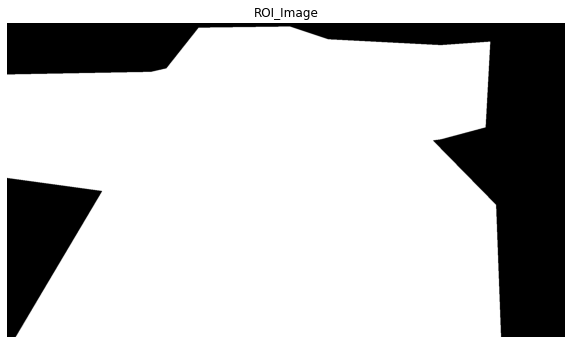

In [7]:
# -- Get the ROI image -- #
roi_image = cv2.imread(str(AICITY_DATA_ROOT / 'roi.jpg'), cv2.IMREAD_GRAYSCALE)
plot_img(roi_image, cmap='gray', title='ROI_Image', save_root=RESULTS_ROOT/'week2')

In [17]:
# -- Background Model -- #
model = AdaptativeBackgroundModel(height, width)
bg_mean, bg_std = model.estimate_background(training_frames)

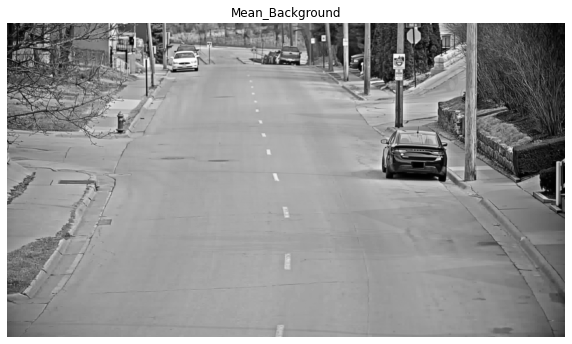

In [19]:
plot_img(bg_mean, cmap='gray', title='Mean_Background', save_root=RESULTS_ROOT/'week2')

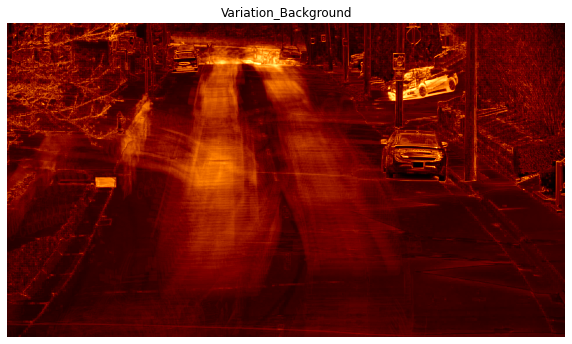

In [21]:
plot_img(bg_std, cmap='afmhot', title='Variation_Background', save_root=RESULTS_ROOT/'week2')

For the moment is the same as the task1. Now we will use the following frames to adapt the background pixels

In [23]:
eval_frames = frames[training_split_idx:]
len(eval_frames)

1606

In [58]:
foreground_frames, background_frames = model.evaluate(eval_frames, alpha=2, rho=0.1)

Now we want to detect bboxes from the foregrund and see how the background changes from frame to frame

### TODO:
* find optimal alpha and rho
* implement the for (easy)
* develop a video for the background frames

In [ ]:
detections = OrderedDict()
for mask, frame_id in zip(foreground_frames, range(training_split_idx, len(frames)):
    mask = remove_noise_from_mask(mask)
    detections[frame_id] = detect_bbox_from_mask(mask, frame_id)

with the detections compute the voc_ap

## Task 3

## Task 4